In [1]:
import cv2
import PIL
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

import torch
from torch import nn
from torch.autograd import Variable, Function
from torchvision import models, transforms

%matplotlib inline

In [2]:
path = "/home/lestsovba/pic/124044lpr.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

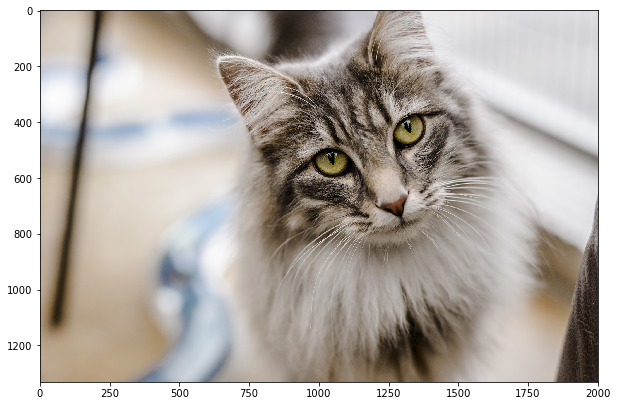

In [3]:
plt.figure(figsize=(10,8))
plt.imshow(img)

In [5]:
torch.cuda.set_device(3)

In [6]:
vgg = models.vgg11(pretrained=True).eval()
#vgg.features = torch.nn.DataParallel(vgg.features)
vgg.cuda()

VGG (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU (inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU (inplace)
    (15): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (16): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU (inpla

In [7]:
f = open(path, 'rb')
im1 = Image.open(f)

In [8]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
tr = transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize,
        ])

img = tr(im1)
img = Variable(img, requires_grad=False).unsqueeze(0).cuda()

In [9]:
tmp = "".join(open("labels.txt", 'r').readlines()).replace("\n", "")
labeldict = eval(tmp)

In [12]:
res = vgg.forward(img)

res = nn.Softmax()(res)
prob, ind = torch.topk(res, 5)

for i in range(ind.size()[1]):
    print(labeldict[ind[0][i].data[0]], " : ", prob[0][i].data[0])

tiger cat  :  0.476656049489975
tabby, tabby cat  :  0.28353145718574524
Egyptian cat  :  0.18829463422298431
lynx, catamount  :  0.047707922756671906
Persian cat  :  0.0017967952881008387
